## **Описание проекта: оценка рисков невозврата кредита**

В нашем распоряжении данные клиентов банка, которые планируют взять кредит. Необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Нам предстоит подготовить данные к анализу и исследовать их.

### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.




## Шаг 1. Изучим общую информацию о датасете

1. Загрузим датасет.
2. Сделаем его копию.
3. Изучим типы данных и определим, соответствуют ли они содержимому. 
4. Сделаем вывод.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_csv('https://code.s3.yandex.net/datasets/credit_scoring_eng.csv')

In [4]:
df = df_raw.copy()


In [5]:
df.info()
df.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19910,0,-13702.636708,55,secondary education,1,married,0,F,employee,0,19509.115,construction of own property
11050,0,NaN,42,secondary education,1,divorced,3,F,employee,0,NaN,education
6529,0,NaN,48,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,buy real estate
1239,0,374093.630347,72,secondary education,1,civil partnership,1,M,retiree,0,17362.070,to have a wedding
10496,0,-1644.023901,28,some college,2,civil partnership,1,M,employee,1,15542.293,to buy a car
18794,0,-549.850648,62,secondary education,1,widow / widower,2,F,civil servant,0,19270.615,buy real estate
5474,0,339717.000654,59,bachelor's degree,0,widow / widower,2,F,retiree,0,20913.988,purchase of the house
7994,1,-893.569326,27,secondary education,1,married,0,F,employee,0,22453.444,transactions with commercial real estate
21180,0,-1099.094396,43,secondary education,1,married,0,F,business,0,20102.114,purchase of a car
1729,0,-1196.130706,35,secondary education,1,unmarried,4,F,employee,0,39972.850,real estate transactions


<div class="alert alert-info">
<b>Датасет представляет собой данные клиентов банка. Размер датасета: 12 колонок и 21525 строки. Все колонки имеют корректный тип данных и соответствуют содержимому, за исключением колонки days_employed. Данные в этом стоблце имеют тип float64 и минусовые значения, что невозможно для количества отработанных дней. В анализе мы не будем использовать эту колонку.</b> 
</div>


## Шаг 2. Выполним предобработку данных




1. Найдём и изучим пропущенные значения в столбцах. 
2. Устраним пропущенные значения: удалим или заменим их. 
3. Объясним выбранную стратегию обработки пропущенных значений.



In [6]:
total_len = len(df)
isna_by_column = df.isna().sum()
total_isna = df.isna().sum().sum()
print('Количество строк в датафрейме:', total_len)
print('Количество пропущенных значений по столбцам:')
print(isna_by_column)
print('Полное количество пропущенных значений по всему датасету:')
print(total_isna)
# Подсчтаем долю пропусков
share = total_isna / total_len
print(f'Доля пропусков в датасете равна: {share:.2%}')
#Количество пропусков полностью совпадает в столбцах 'days_employed'
#и 'total_income' - логично предположить, что человек без дохода не работает. Заменим пропуски на 0 в обоих столбцах.
df.fillna({'days_employed':0, 'total_income':0}, inplace=True)
print('Количество пропущенных значений по столбцам после замены')
print(df[['days_employed','total_income']].isna().sum())


Количество строк в датафрейме: 21525
Количество пропущенных значений по столбцам:
children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64
Полное количество пропущенных значений по всему датасету:
4348
Доля пропусков в датасете равна: 20.20%
Количество пропущенных значений по столбцам после замены
days_employed    0
total_income     0
dtype: int64


<div class="alert alert-info">
<b> Полное количество пропущенных значений по всему датасету: 4348, что составляет 20.20% от всего объёма данных. </b> 
</div>

<div class="alert alert-info">
<b>Количество пропусков полностью совпадает в столбцах 'days_employed' и 'total_income' - логично предположить, что человек без дохода не работает. Заменим пропуски на 0 в обоих столбцах. </b> 
</div>



1. Изучим уникальные значения в столбцах с уровнем образования (`education`) и полом клиента (`gender`). 
2. Устраним неявные дубликаты и некорректные значения.



In [7]:
columns = ['education','gender']
for column in columns:
    unique_values = df[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}.')
#в стоблце 'education' много дупликатов, приведём все значения к нижнему регистру 
df['education'] = df['education'].str.lower()
print((df['gender'] == 'XNA').sum())
#есть всего одна строка, где пол не определён, предлагаю удалить эту строку 
df = df.drop(df[df['gender'] == 'XNA'].index)

Уникальные значения в столбце education: ["bachelor's degree" 'secondary education' 'Secondary Education'
 'SECONDARY EDUCATION' "BACHELOR'S DEGREE" 'some college'
 'primary education' "Bachelor's Degree" 'SOME COLLEGE' 'Some College'
 'PRIMARY EDUCATION' 'Primary Education' 'Graduate Degree'
 'GRADUATE DEGREE' 'graduate degree'].
Уникальные значения в столбце gender: ['F' 'M' 'XNA'].
1


<div class="alert alert-info">
<b>В стоблце 'education' много дупликатов, приведём все значения к нижнему регистру. В столбце 'gender' есть всего одна строка, где пол не определён, предлагаю удалить эту строку. </b> 
</div>



1. Надо проверить наличие дубликатов. Изучим дублированные данные, если они есть, и примим решение — удалять их или оставить.



In [8]:
print('Найдено дубликатов:', df.duplicated().sum())
print(df[['total_income','purpose']][df.duplicated(keep='last')]) 
# удалим явные дубликаты
df = df.drop_duplicates()
print('Найдено дубликатов:', df.duplicated().sum())


Найдено дубликатов: 71
       total_income                              purpose
120             0.0                 university education
520             0.0                    to have a wedding
541             0.0             second-hand car purchase
554             0.0                      buy real estate
680             0.0  purchase of the house for my family
...             ...                                  ...
15892           0.0             second-hand car purchase
16148           0.0                     wedding ceremony
16176           0.0                   housing renovation
17291           0.0                     having a wedding
17787           0.0                 housing transactions

[71 rows x 2 columns]
Найдено дубликатов: 0



## Шаг 3. Выбросы и аномальные значения

Изучим столбцы `total_income`, `dob_age`, `chidlren` на наличие выбросов и аномальных значений, в том числе при помощи графиков. Если выбросы или аномалии будут обнаружены — надо принять решение об их судьбе. 



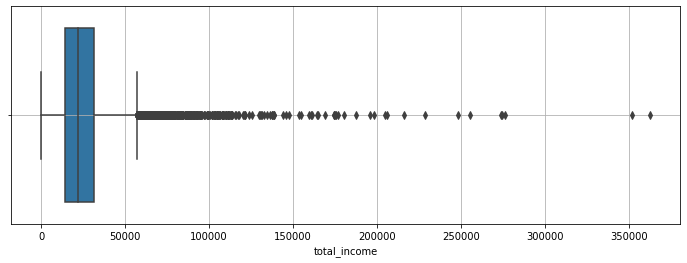

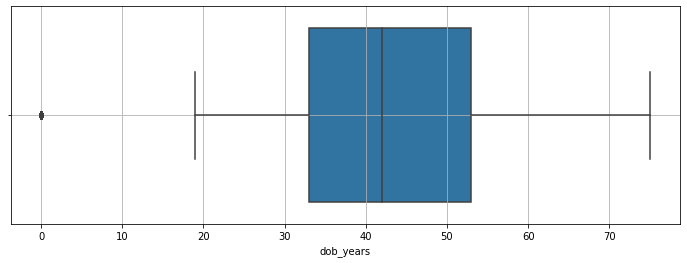

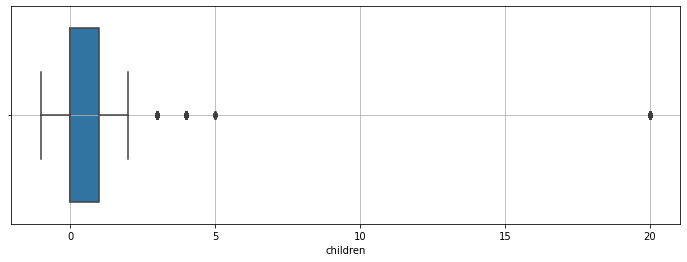

In [10]:
columns = ['total_income','dob_years','children']
df[columns].describe()
for column in columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=column,data=df)
    
    plt.grid()
    plt.show()


In [12]:
print(df[df['dob_years'] == 0].shape[0])
print(df.query('children == 20 or children == -1').shape[0])
print(df[df['total_income'] > 350000].shape[0])
#поделим значения 'children' на 10, чтобы получить 2, также заменим -1 на 1
df.loc[df['children'] == 20,'children'] = df['children'] / 10
df.loc[df['children'] == -1,'children'] = 1

#расчитаем количество строк, потерянных в процессе предобработки
total_len = len(df)
share_len = len(df.query('dob_years == 0'))
share = share_len / total_len
print(f'доля строк, потерянных в процессе предобработки: {share:.2%}')  

#удалим нулевые значения 'dob_years'
df = df.drop(df[df['dob_years'] == 0].index)



101
123
2
доля строк, потерянных в процессе предобработки: 0.47%


<div class="alert alert-info">
<b>Есть всего два выброса в стобце 'total_income' - это могут быть реальные значения дохода у людей с собственным бизнесом.
Выбросы в столбце 'children' - в 76 строках количество детей 20. Скорее всего это программная ошибка, был добавлен дополнительный 0.
Также есть значения в столце 'children' -1, таких строк 47. Скорее всего ошибочно добавили минус.
В этом столбце предлагаю удалить 0, чтобы поменять 20 на 2, и удалить минусовые значения, чтобы перевести -1 в 1. Также есть 101 строка с 0 значением 'dob_years', думаю, что надо их удалить, так как нет возможности определить возраст по другим столбцам.
Доля строк, потерянных в процессе предобработки: 0.47%</b> 
</div>



## Шаг 4. Добавьте в таблицу новые столбцы




1. **Разделим клиентов на 5 категорий по уровню дохода:**
- Без дохода — люди без работы и с нулевым доходом.
- Очень низкий доход — люди, получающие ниже 14 процентиля от общего распределения дохода.
- Низкий доход — люди, получающие между 14 и 34 процентилями от общего распределения дохода.
- Средний доход — люди, получающие между 34 и 78 процентилями от общего распределения дохода.
- Высокий доход — люди, получающие больше 78 процентиля от общего распределения дохода.



In [13]:
def income_cat(total_income):
    if total_income == 0:
        return 'Без дохода'
    elif total_income < df['total_income'].quantile(0.14):
        return 'Очень низкий доход'
    elif df['total_income'].quantile(0.34) > total_income > df['total_income'].quantile(0.14):
        return 'Низкий доход'
    elif df['total_income'].quantile(0.78) > total_income > df['total_income'].quantile(0.34):
        return 'Средний доход'
    elif total_income > df['total_income'].quantile(0.78):
        return 'Высокий доход'
df['income_category'] = df['total_income'].apply(income_cat)  
print(df['income_category'].value_counts())

income_category
Средний доход         9426
Высокий доход         4713
Низкий доход          4284
Без дохода            2164
Очень низкий доход     836
Name: count, dtype: int64



1. Разделим клиентов на две категории по возрасту: до 40 лет и после. Сохраним результат в колонке `age_category`.



In [14]:
def age_category(dob_years):
    if dob_years < 40:
        return 'До 40 лет'
    if dob_years >= 40:
        return '40 и более лет'
df['age_category'] = df['dob_years'].apply(age_category)  
print(df['age_category'].value_counts())

age_category
40 и более лет    12567
До 40 лет          8856
Name: count, dtype: int64



1. Разделим клиентов на несколько категорий по количеству детей: без детей, от одного до двух, от трёх и больше. Сохраним результат в колонке `childrens_category`.



In [15]:
def childrens_category(children):
    if children == 0:
        return 'Без детей'
    if 2 >= children >= 1:
        return 'От одного до двух детей'
    if children >= 3:
        return 'От трёх и больше детей'
df['childrens_category'] = df['children'].apply(childrens_category)  
print(df['childrens_category'].value_counts())

childrens_category
Без детей                  14079
От одного до двух детей     6966
От трёх и больше детей       378
Name: count, dtype: int64



## Шаг 5. Проведём исследовательский анализ данных




Исследуем факторы и их корреляцию с долгом : `Уровень дохода`, `Образование`, `Возраст`, `Количество детей`.  Исследуем вопрос графически. Построим сводную таблицу по каждому фактору и покажем, как часто встречаются должники в каждой группе клиентов. 



              debt  education_id  total_income  dob_years  children
debt          1.00          0.05         -0.01      -0.07      0.03
education_id  0.05          1.00         -0.15       0.07     -0.03
total_income -0.01         -0.15          1.00      -0.05      0.03
dob_years    -0.07          0.07         -0.05       1.00     -0.32
children      0.03         -0.03          0.03      -0.32      1.00
      income_category      debt
0       Средний доход  0.088054
1        Низкий доход  0.082400
2          Без дохода  0.078558
3       Высокий доход  0.070019
4  Очень низкий доход  0.059809
             education      debt
0    primary education  0.109929
1         some college  0.091768
2  secondary education  0.089459
3    bachelor's degree  0.053014
4      graduate degree  0.000000
     age_category      debt
0       До 40 лет  0.101739
1  40 и более лет  0.066205
        childrens_category      debt
0  От одного до двух детей  0.092449
1   От трёх и больше детей  0.082011
2      

<Figure size 1000x600 with 0 Axes>

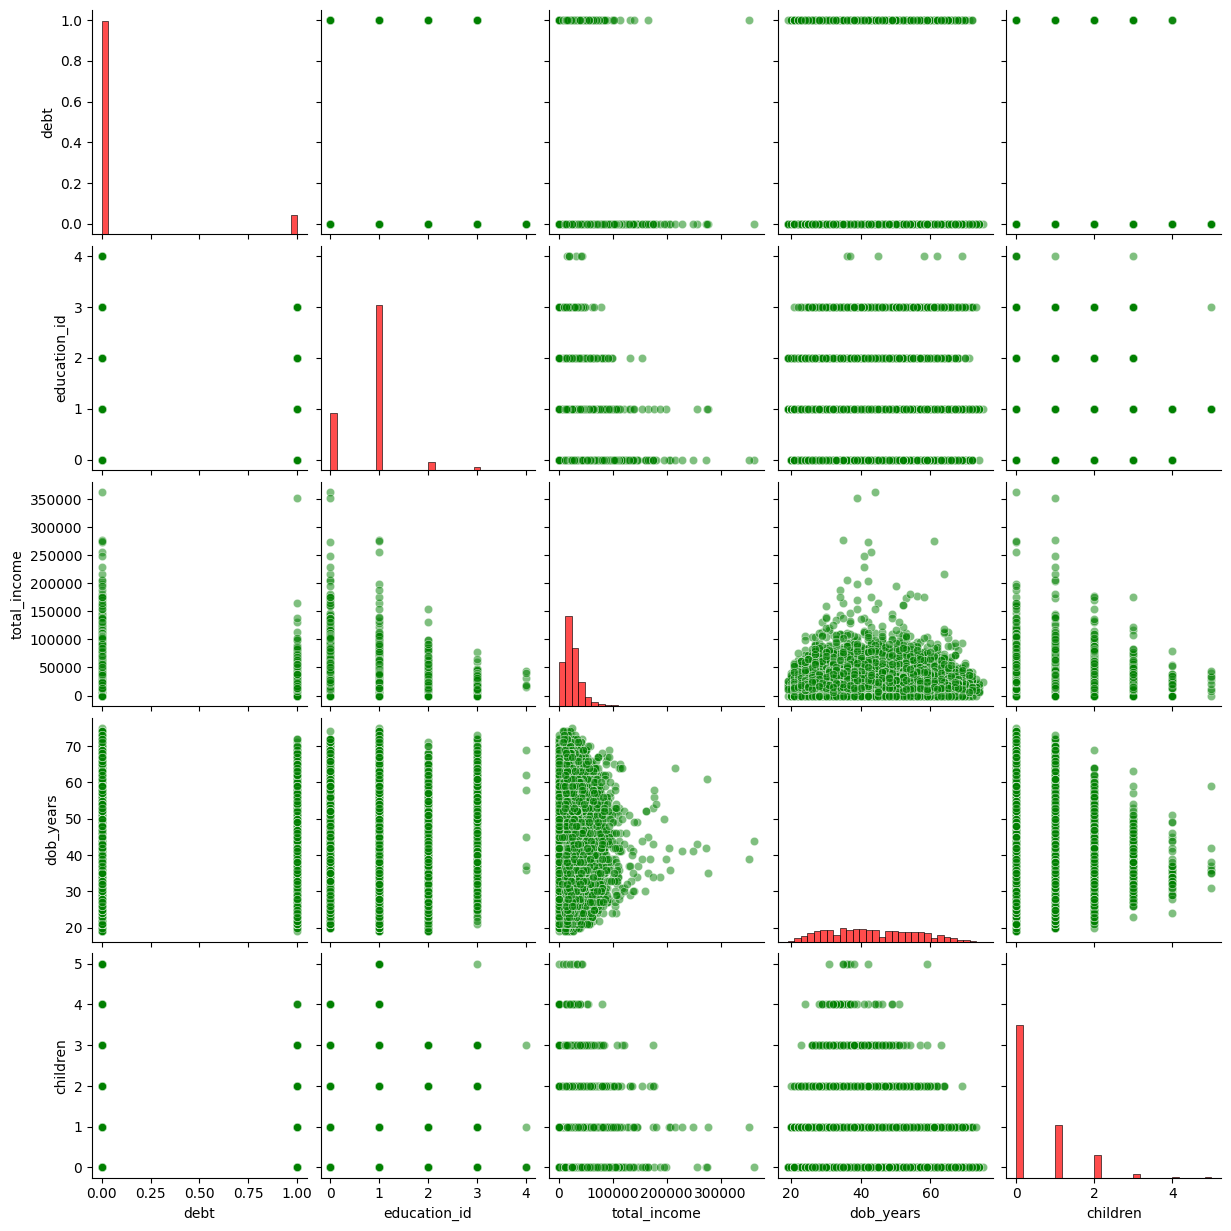

In [16]:
#расчитаем матрицу корреляции между категориями:
data_corr = round((df[['debt' ,'education_id', 'total_income', 'dob_years', 'children']].corr()),2)
print(data_corr)
#построим матрицу распределений для следующих столбцов
data_fragment = df[['debt','education_id', 'total_income', 'dob_years', 'children']]

# Задаём размер визуализации:
plt.figure(figsize=(10, 6))

# Настраиваем параметры визуализации для графиков рассеивания:
plot_kws = {'color': 'green', 'marker': 'o', 'linewidth': 0.5, 'alpha': 0.5}# ваш код здесь

# Настраиваем параметры визуализации для гистограмм:
diag_kws = {'color': 'red', 'bins': 30, 'alpha': 0.7} # ваш код здесь

# Строим матрицу распределений:
sns.pairplot(data_fragment, plot_kws=plot_kws, diag_kws=diag_kws)

#покажем, как часто встречаются должники в каждой группе клиентов

df_agg_inc= df.groupby('income_category').agg({'debt': 'mean'}).sort_values(by=('debt'),ascending=False).reset_index()
df_agg_edu= df.groupby('education').agg({'debt': 'mean'}).sort_values(by=('debt'),ascending=False).reset_index()
df_agg_age=df.groupby('age_category').agg({'debt': 'mean'}).sort_values(by=('debt'),ascending=False).reset_index()
df_agg_child=df.groupby('childrens_category').agg({'debt': 'mean'}).sort_values(by=('debt'),ascending=False).reset_index()

print(df_agg_inc)
print(df_agg_edu)
print(df_agg_age)
print(df_agg_child)


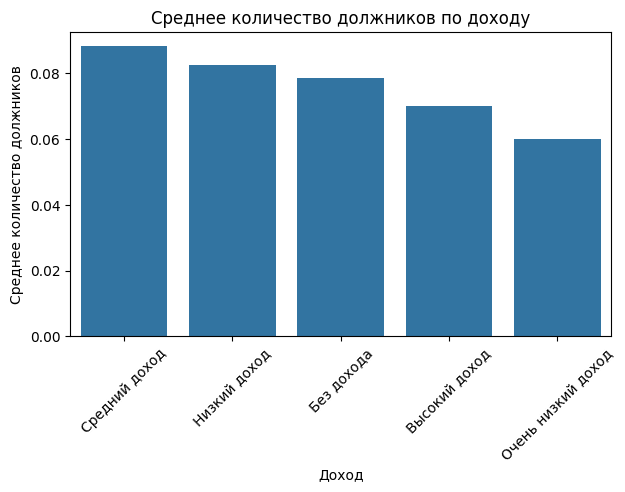

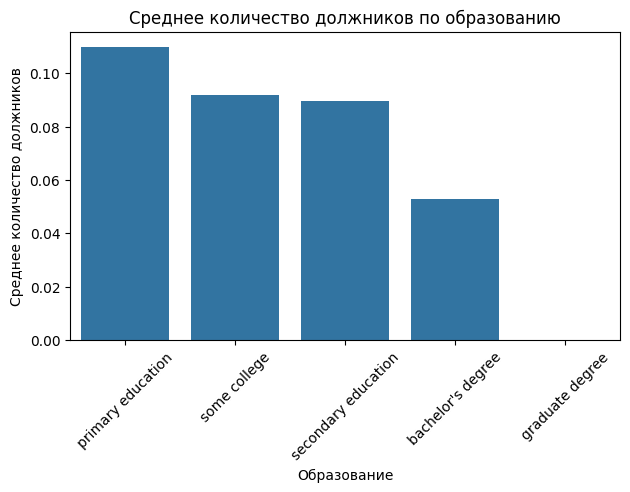

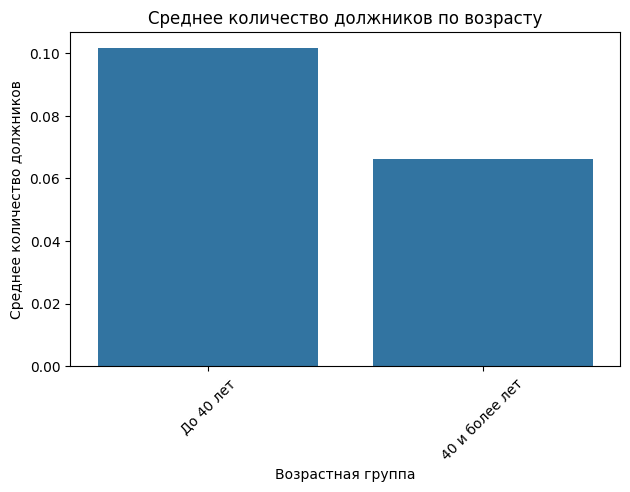

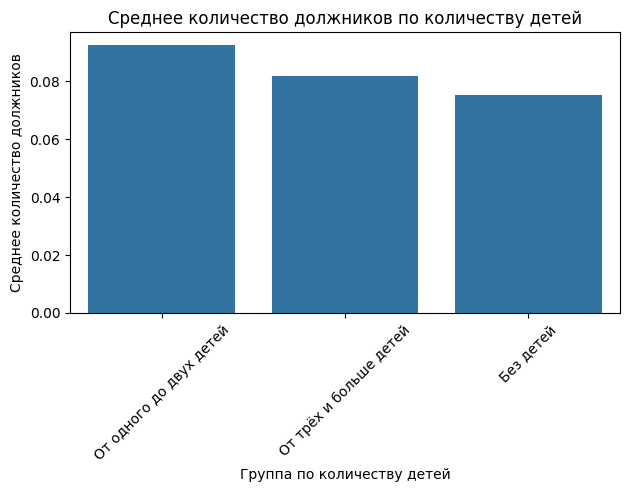

In [17]:
#сравним группы вернувших и не вернувших кредит

sns.barplot(data=df_agg_inc, y='debt', x='income_category')
plt.xticks(rotation=45)
plt.ylabel('Среднее количество должников')
plt.xlabel('Доход')
plt.tight_layout()
plt.title('Среднее количество должников по доходу')
plt.show() 

sns.barplot(data=df_agg_edu, y='debt', x='education')
plt.xticks(rotation=45)
plt.ylabel('Среднее количество должников')
plt.xlabel('Образование')
plt.tight_layout()
plt.title('Среднее количество должников по образованию')
plt.show() 

sns.barplot(data=df_agg_age, y='debt', x='age_category')
plt.xticks(rotation=45)
plt.ylabel('Среднее количество должников')
plt.xlabel('Возрастная группа')
plt.tight_layout()
plt.title('Среднее количество должников по возрасту')
plt.show() 

sns.barplot(data=df_agg_child, y='debt', x='childrens_category')
plt.xticks(rotation=45)
plt.ylabel('Среднее количество должников')
plt.xlabel('Группа по количеству детей')
plt.tight_layout()
plt.title('Среднее количество должников по количеству детей')
plt.show() 


<b> Были проведены следующие исследования:</b>
    <h4> 1.  Корреляция между доходом и наличием долга.<a class="tocSkip"></h4>Наибольшее среднее количество должников среди людей со средним доходом(0.088), далее идут люди с низким доходом(0.081) и совсем без дохода(0.081), после с высоким дохом(0.070) и наименьшее среднее количество должников у людей с очень низким доходом(0.063). 
    <h4> 2. Корреляция между образованием и наличием долга. <a class="tocSkip"></h4>Наибольшее среднее количество должников среди людей с начальным образованием(primary education)(0.109), далее идут люди образованием в колледже(0.091), после них люди со средним образованием(secondary education)(0.089) и наименьшее количество должников у людей с бакалавриатом(0.053). Совсем нет должников у людей с учёной степенью. <b>Таким образом мы можем сказать: чем выше образование, тем меньше среднее количество людей с долгами по кредиту.</b> 
    <h4> 3. Корреляция между возрастом и наличием долга.  <a class="tocSkip"></h4>Наибольшее среднее количество должников среди людей до 40 лет(0.101). Гораздо меньше должников встречается у людей после 40 лет(0.066).
    <h4> 4. Корреляция между наличием детей и долга.  <a class="tocSkip"></h4> Наибольшее среднее количество должников среди людей имеющих от одного до двух детей(0.092), далее идут люди с количеством детей от трёх и больше(0.082). Наименьшее среднее количество должников среди людей без детей(0.075).



***Проверим исследовательскую гипотезу***: у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.



child_presence
Без детей    14079
Есть дети     7344
Name: count, dtype: int64


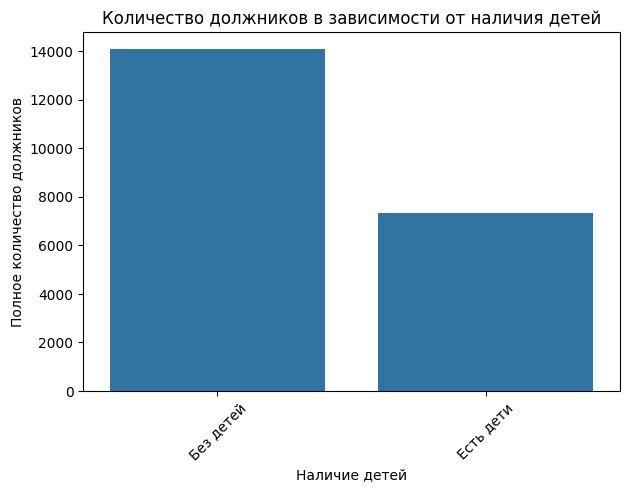

In [18]:
# Добавим новый столбец
def child_presence(children):
    if children == 0:
        return 'Без детей'
    elif children > 0:
        return 'Есть дети'
df['child_presence'] = df['children'].apply(child_presence)  
print(df['child_presence'].value_counts())

df_agg_child_pres=df.groupby('child_presence').agg({'debt':'count'}).reset_index()


sns.barplot(data=df_agg_child_pres, y='debt', x='child_presence')
plt.xticks(rotation=45)
plt.ylabel('Полное количество должников')
plt.xlabel('Наличие детей')
plt.tight_layout()
plt.title('Количество должников в зависимости от наличия детей')
plt.show() 


***Проверим исследовательскую гипотезу***: одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.



85
0


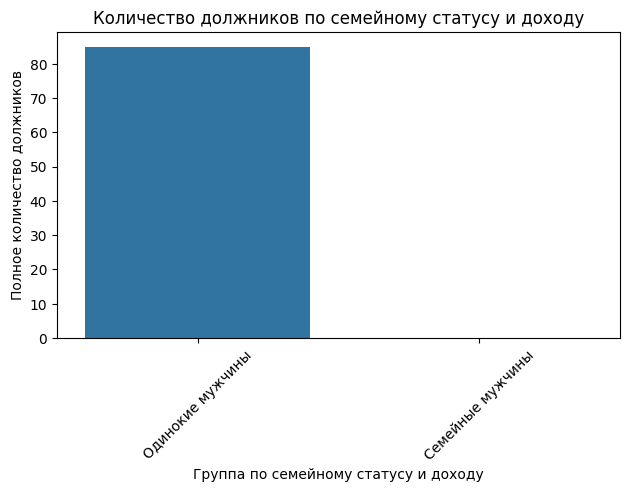

In [19]:
filter_df1 = df.query('gender == "M" and income_category == "низкий доход" and family_status =="unmarried" or family_status=="divorced"')
filter_df2 = df.query('gender == "M" and income_category == "средний доход" and family_status =="married"')
sum_debt_filter_df1 = filter_df1['debt'].sum()
sum_debt_filter_df2 = filter_df2['debt'].sum()

print(sum_debt_filter_df1)
print(sum_debt_filter_df2)


sns.barplot(x=['Одинокие мужчины', 'Семейные мужчины'], y=[sum_debt_filter_df1, sum_debt_filter_df2])
plt.xticks(rotation=45)
plt.ylabel('Полное количество должников')
plt.xlabel('Группа по семейному статусу и доходу')
plt.tight_layout()
plt.title('Количество должников по семейному статусу и доходу')
plt.show() 


## Шаг 6. Общий вывод



<div class="alert alert-info">
<b>
Есть очень слабая положительная корреляция между должниками и:
    
1. образованием (0.05) - чем выше образование, тем меньше должников
2. количеством детей (0.03) - в семьях с детьми, должников меньше

Очень слабая  отрицательная корреляция между:
1. возрастом (-0.07) - чем меньше возраст, тем больше должников
2. доходом (-0.01) - чем ниже доход, тем больше должников
    
Столбчатые диаграммы подтверждают эти выводы.
  
Также при помощи столбчатых диаграмм мы подтвердили следующие гипотезы:
- у клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.
- одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.
</b> 
</div>   



---